<a href="https://colab.research.google.com/github/jh6695/study/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4_5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 자동 미분

In [6]:
import tensorflow as ts

In [7]:
w = tf.Variable(2.0)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [8]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w]) #[x] 리스트 형태로
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


#자동 미분을 이용한 선형 회귀 구현

In [9]:
#학습될 가중치 변수 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [10]:
#가설을 함수로 정의
@tf.function #성능 향상
def hypothesis(x):
  return w*x + b

In [11]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [12]:
@tf.function
def mse_loss(y_pred, y):
  #두개의 차이값을 계산해 평균함
  return tf.reduce_mean(tf.square(y_pred - y))

In [13]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적


In [14]:
#옵티마이저 경사하강법 학습률 0.01
optimizer = tf.optimizers.SGD(0.01)

In [15]:
#약 300번에 걸쳐 경사하강법 수행
for i in range(301):
  with tf.GradientTape() as tape:
    #현재 피라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    #평균 제곱 오차 계산
    cost = mse_loss(y_pred, y)

  #손실 함수에 대한 피라미터 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  #피라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch: {:3} | w값: {:5.4f} | b값: {:5.4f} | cost: {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch:   0 | w값: 8.2133 | b값: 1.6644 | cost: 1402.555542
epoch:  10 | w값: 10.4971 | b값: 1.9769 | cost: 1.351182
epoch:  20 | w값: 10.5047 | b값: 1.9297 | cost: 1.328165
epoch:  30 | w값: 10.5119 | b값: 1.8844 | cost: 1.306967
epoch:  40 | w값: 10.5188 | b값: 1.8409 | cost: 1.287436
epoch:  50 | w값: 10.5254 | b값: 1.7991 | cost: 1.269459
epoch:  60 | w값: 10.5318 | b값: 1.7591 | cost: 1.252898
epoch:  70 | w값: 10.5379 | b값: 1.7206 | cost: 1.237644
epoch:  80 | w값: 10.5438 | b값: 1.6837 | cost: 1.223598
epoch:  90 | w값: 10.5494 | b값: 1.6483 | cost: 1.210658
epoch: 100 | w값: 10.5548 | b값: 1.6143 | cost: 1.198740
epoch: 110 | w값: 10.5600 | b값: 1.5817 | cost: 1.187767
epoch: 120 | w값: 10.5650 | b값: 1.5504 | cost: 1.177665
epoch: 130 | w값: 10.5697 | b값: 1.5204 | cost: 1.168354
epoch: 140 | w값: 10.5743 | b값: 1.4916 | cost: 1.159782
epoch: 150 | w값: 10.5787 | b값: 1.4639 | cost: 1.151890
epoch: 160 | w값: 10.5829 | b값: 1.4373 | cost: 1.144619
epoch: 170 | w값: 10.5870 | b값: 1.4119 | cost: 1.137924
epoch: 1

업데이트됨에 따라 cost 지속적으로 감소

In [16]:
#학습된 w, b값에 대해 임의의 값 넣었을 때 예측값 확인
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


#2. 케라스로 구현하는 선형 회귀


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

#출력 차원 1, 입력 차원 1
#선형
model.add(Dense(1, input_dim = 1, activation = 'linear'))

#경사하강법. 학습률 lr=0.01
sgd = optimizers.SGD(lr=0.01)

#모델 컴파일
#손실함수 mse, 평가지표 mse
model.compile(optimizer=sgd, loss='mse', metrics =['mse'])

#300번 수행
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 650ms/step - loss: 3479.6514 - mse: 3479.6514
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 429.1971 - mse: 429.1971
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 53.8608 - mse: 53.8608
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 7.6774 - mse: 7.6774
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 1.9939 - mse: 1.9939
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2936 - mse: 1.2936
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2064 - mse: 1.2064
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1947 - mse: 1.1947
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 1.1924 - mse: 1.1924
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 1.1911 - mse: 1.1911
Epoch 11/300
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 103ms/step


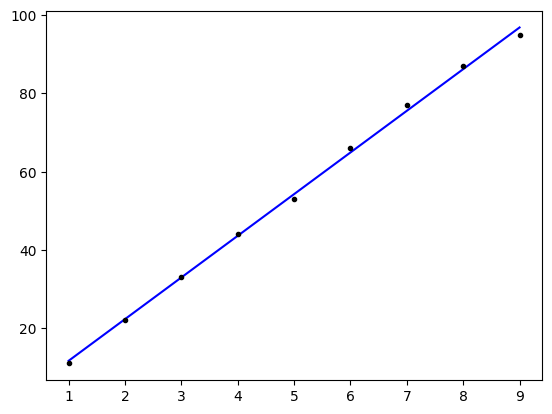

In [18]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
# 'b' - 파랑색 선
# x, y, 'k.' - x, y를 검정색 점으로 표시

In [19]:
# 9시간 30분을 공부할때 y
print(model.predict([9.5]))

1/1 [==============================] - 0s 63ms/step
[[102.17574]]



---
#로지스틱 회귀
#1. 시그모이드 함수
- 0과 1 사이의 값을 가짐.
- 입력값이 커질수록 1에 수렴하고, 작아질수록 0에 수렴한다.
- 출력값이 0.5 이상이면 1(True), 0.5 이하면 0(False)인 이진 분류 문제를 풀기 위해 사용 가능.


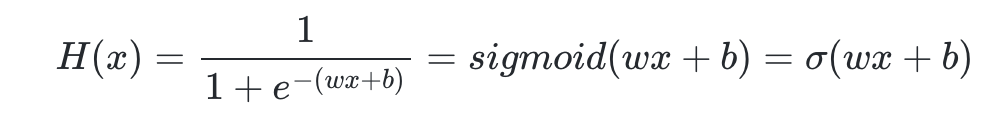

In [20]:
import numpy as np
import matplotlib.pyplot as plt

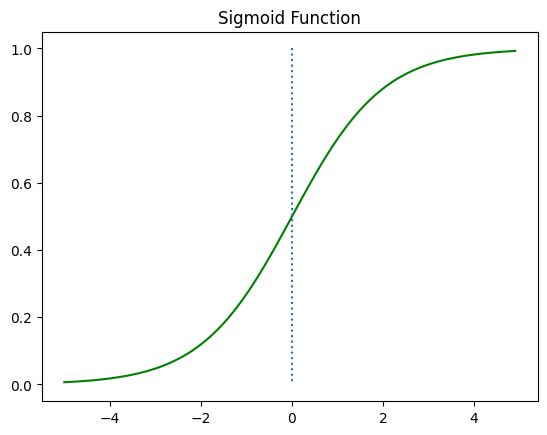

In [21]:
# w는 1, b는 0으로 가정
def sigmoid(x):
  return 1/(1+np.exp(-x)) #np.exp - 밑이 자연상수 e인 지수함수(e^x)

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') #[0, 0]부터 [1.0, 0.0]까지 점선
plt.title('Sigmoid Function')
plt.show()

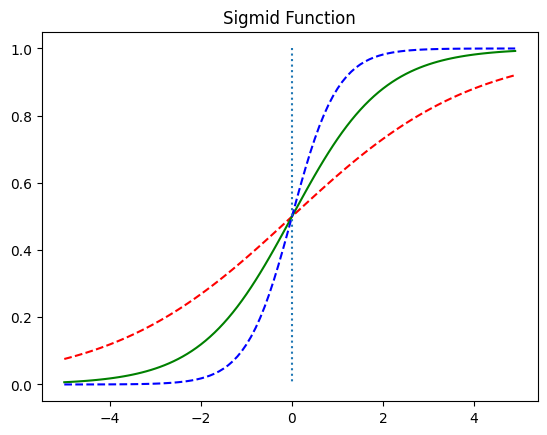

In [22]:
#w와 b가 출력값에 어떤 영향을 미치는지
## w의 경우
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x) #w: 0.5
y2 = sigmoid(x)
y3 = sigmoid(2*x) #x: 2

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmid Function')
plt.show()

w값은 그래프의 경사도를 결정한다. 값이 클수록 경사 커짐.

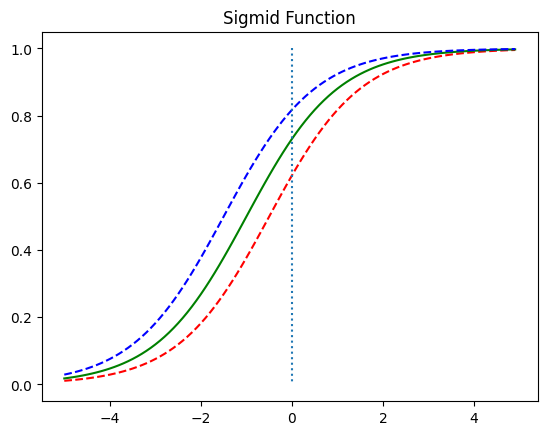

In [23]:
#b가 변하는 경우
#w와 b가 출력값에 어떤 영향을 미치는지
## w의 경우
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5) #b: 0.5
y2 = sigmoid(x+1) #b: 1
y3 = sigmoid(x+1.5) #b: 1.5

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmid Function')
plt.show()

b값에 따라 그래프 이동.

#2. 케라스로 구현하는 로지스틱 회귀

독립변수를 x, 10 이하면 0, 10 이상이면 1을 부여한 레이블 데이터를 y라고 한다.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim =1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics='binary_accuracy')

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 430ms/step - loss: 38.7509 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 33.2464 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 27.7423 - binary_accuracy: 0.1538
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 22.2392 - binary_accuracy: 0.1538
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 16.7393 - binary_accuracy: 0.1538
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 11.2505 - binary_accuracy: 0.1538
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 5.8037 - binary_accuracy: 0.1538
Epoch 8/200
1/1 [==============================] - 0s 12ms/step - loss: 0.8386 - binary_accuracy: 0.1538
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 0.2204 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================

1/1 [==============================] - 0s 50ms/step


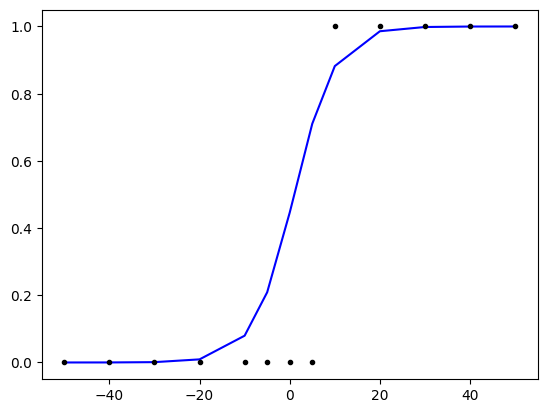

In [25]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

그래프상 x가 0와 5 사이 어떤 값일때 y값이 0.5가 넘는 것으로 보인다. 적어도 x값이 0보다 작을 때 y가 0.5보다 작고, 적어도 x가 5보다 클 때 y가 0.5보다 클 것이다. x가 0보다 작을 때와 5보다 클 때의 y를 출력해 보자.

In [26]:
print(model.predict([-5,-4,-3,-2,-0.5]))
print(model.predict([1,2,3,4,5]))

1/1 [==============================] - 0s 93ms/step
[[0.20893128]
 [0.2481652 ]
 [0.2920467 ]
 [0.34017664]
 [0.41871008]]
1/1 [==============================] - 0s 68ms/step
[[0.5015913 ]
 [0.55708075]
 [0.61118126]
 [0.66267496]
 [0.71057844]]


0보다 작을 때는 0.5 이하, 5보다 클 때는 0.5 이상인 것을 알 수 있다.

#3. 다중 선형 회귀

독립변수가 3개인 선형회귀(입력 차원이 3)

H(X) = w1x1 + w2x2 + w3x3 + b

In [27]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]])
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add((Dense(1, input_dim=3, activation='linear'))) #입력 벡터 3

sgd = optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 446ms/step - loss: 16192.0186 - mse: 16192.0186
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 8575.3574 - mse: 8575.3574
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 4547.5396 - mse: 4547.5396
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 2415.8738 - mse: 2415.8738
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 1286.5978 - mse: 1286.5978
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 687.6041 - mse: 687.6041
Epoch 7/2000
1/1 [==============================] - 0s 26ms/step - loss: 369.3878 - mse: 369.3878
Epoch 8/2000
1/1 [==============================] - 0s 15ms/step - loss: 200.0045 - mse: 200.0045
Epoch 9/2000
1/1 [==============================] - 0s 16ms/step - loss: 109.6227 - mse: 109.6227
Epoch 10/2000
1/1 [==============================] - 0s 13ms/step - loss: 61.2481 - mse: 61.2481
Epoch 11

In [28]:
print(model.predict(X)) #실제와 근접

1/1 [==============================] - 0s 72ms/step
[[72.9282  ]
 [81.97733 ]
 [72.096756]
 [57.117146]
 [33.80404 ]]


In [29]:
#훈련에 사용하지 않은 데이터로 예측해 보기(y = [58, 56])
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

1/1 [==============================] - 0s 32ms/step
[[57.89517 ]
 [56.062576]]


#4. 다중 로지스틱 회귀
독립변수 2개인 로지스틱 회귀

H(X) = sigmoid(w1x1 + w2x2 + b)

두개의 x의 합이 2 이상이면 y가 1, 2 미만이면 0이 되는 로직 구현.

In [30]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add((Dense(1, input_dim=2, activation='sigmoid'))) #x 2차원
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 596ms/step - loss: 0.6350 - binary_accuracy: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6347 - binary_accuracy: 0.6667
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6344 - binary_accuracy: 0.6667
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6341 - binary_accuracy: 0.6667
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6338 - binary_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6335 - binary_accuracy: 0.6667
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6332 - binary_accuracy: 0.6667
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6329 - binary_accuracy: 0.6667
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6326 - binary_accuracy: 0.6667
Epoch 10/2000
1/1 [==========================

In [31]:
print(model.predict(X))

1/1 [==============================] - 0s 72ms/step
[[0.16600919]
 [0.44627887]
 [0.45097992]
 [0.765441  ]
 [0.76883596]
 [0.77219635]]


입력값의 합이 2 이상이면 0.5 이상인 것을 확인할 수 있다.